In [68]:
from math import sin, cos, log, pi
import numpy
from matplotlib import pyplot
%matplotlib inline
from matplotlib import rcParams
rcParams['font.family'] = 'serif'
rcParams['font.size'] = 16

In [69]:
output = numpy.linspace(4,23,43)
output[5]

6.2619047619047619

In [70]:
p = 7
r = numpy.array([11.2, 4.7, 6.6])

In [71]:
(numpy.sin(numpy.divide(p,r)))**3

array([ 0.20030151,  0.99009101,  0.66454238])

In [72]:
(math.sin(7/4.7))**3


0.9900910096418035

In [101]:
 f11 =.01 * numpy.sum( numpy.abs(\
            1.6- 1.475))

In [103]:
 f12 = .02 * numpy.sum( numpy.abs(\
            1.5- 1.475))

In [104]:
 f13 = .02 * numpy.sum( numpy.abs(\
            1.475- 1.475))

In [106]:
 f21 = .02 * numpy.sum( numpy.abs(\
            1.6- 1.475))

In [120]:
f22 =  .04 * numpy.sum( numpy.abs(\
            1.5- 1.475))

In [121]:
f23=f13
f33=f13

In [122]:
 f31 = .04 * numpy.sum( numpy.abs(\
            1.6- 1.475))

In [123]:
 f32 = .04 * numpy.sum( numpy.abs(\
            1.5- 1.475))

In [124]:
(log((f13-f12)/(f12-f11)))/(log(2))

-0.5849625007211644

In [125]:
(log((f23-f22)/(f22-f21)))/(log(2))

-1.2493363364878235e-14

In [126]:
(log((f33-f32)/(f32-f31)))/(log(2))

-2.000000000000006

**This is the EXAM CODE for section *01_ROCKET_ASSIGNMENT*.**

The equations of motion for a rocket in purely vertical flight are given by

\begin{align}
\frac{dh}{dt} &= v\\
(m_s+m_p) \frac{dv}{dt}& = -(m_s+m_p)g + \dot{m}_pv_e - \frac{1}{2}\rho v|v|AC_D
\end{align}

$h$ is the altitude of the rocket

$m_s = 50kg$ is the weight of the rocket shell

$g = 9.81 \frac{m}{s^2}$

$\rho = 1.091 \frac{kg}{m^3}$ is the average air density (assumed constant throughout flight)

$A = \pi r^2$ is the maximum cross sectional area of the rocket, where $r = 0.5 m$

$v_e = 325 \frac{m}{s}$ is the exhaust speed

$C_D = 0.15 $ is the drag coefficient

$m_{po} = 100 kg$ at time $t = 0$ is the initial weight of the rocket propellant

The mass of the remaining propellant is given by:

$$m_p = m_{po} - \int^t_0 \dot{m}_p d\tau$$

where $\dot{m}_p$ is the time-varying burn rate given by the following figure:

Propellant Burn Rate

burn rate is constant $20 \frac{kg}{s}$ from $t = 0$ to $t = 5$ seconds and then $0 \frac{kg}{s}$ at $t >= 5$.

Using Euler's method with a timestep of $\Delta t=0.1s$, create a Python script to calculate the altitude and velocity of the rocket from launch until crash down.  






##Assessment:

To check your answers, you can register for [MAE 6286: Practical Numerical Methods with Python](http://openedx.seas.gwu.edu/courses/GW/MAE6286/2014_fall/about).

1. At time $t=3.2s$, what is the mass (in kg) of rocket propellant remaining in the rocket?

2. What is the maximum speed of the rocket in $\frac{m}{s}$?
    At what time does this occur (in seconds)? 
    What is the altitude at this time (in meters)? 
    
3. What is the rocket's maximum altitude during flight (in meters)? At what time (in seconds) does this occur?

4. At what time (in seconds) does the rocket impact the ground? What is the velocity of the rocket (in $\frac{m}{s}$) at time of impact?

In [188]:
def f(u):
    m_p = u[0]
    b   = u[1]
    v   = u[2]
    h   = u[3]
    
    return numpy.array([-b0,
                        0.0,
                        (-(m_s+m_p)*g+b*v_e-.5*rho*v*abs(v)*a*C_D)/(m_s+m_p),
                        v])

def euler_step(u, f, dt):
    return u + dt * f(u)

In [194]:
# model parameters:
m_s = 50.0        # mass of rocket shell in kg
g = 9.81        # gravity in m s^{-2}
rho = 1.091     # average air density in kg m^{-3}
r = .5          # radius of rocket in m
a = math.pi*r*r # maximum cross section of rocket m^{2}
v_e = 325.0       # exhaust velocity in m s^{-1}   
C_D = 0.15       # drag coefficient
mdot_p_stop= 5.0  # stop time for propellant burn rate

### set initial conditions ###
m_p0 = 100.0      # initial propelant mass in kg
b0 = 20.0         # initial propelant burn rate in kg s^{-1}
v0 = 0.0          # intital volcity in m s^{-1}
h0 = 0.0          # initial rocket altitude in m

T = 100
dt = 0.0001
N = int(T/dt)+1
t = numpy.linspace(0.0, T, N)

u = numpy.zeros((N, 4))
u[0] = numpy.array([m_p0, b0, v0, h0])

for n in range(N-1):
    if n<int(mdot_p_stop/dt+1):
        u[n+1] = euler_step(u[n], f, dt)
        
    else:
        u[n,0]=0.0 
        u[n,1]=0.0
        u[n+1] = euler_step(u[n], f, dt)
        u[n+1,0]=0.0 
        u[n+1,1]=0.0
    if u[n,3]<0:
        stop_time=n*dt
        break

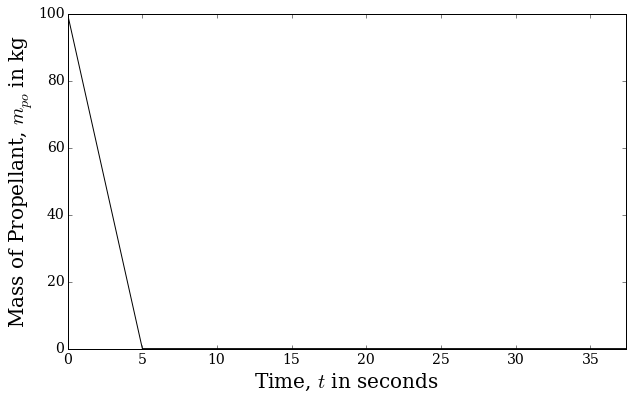

In [195]:
ymax= numpy.amax(u[:,0]);
ymin= numpy.amin(u[:,0]);
xmax= stop_time
pyplot.figure(figsize=(10,6))   #set plot size
pyplot.xlim(0,xmax)             #y-axis plot limits
pyplot.ylim(ymin,ymax)             #y-axis plot limits
pyplot.tick_params(axis='both', labelsize=14) #increase font size for ticks
pyplot.xlabel('Time, $t$ in seconds', fontsize=20) #x label
pyplot.ylabel('Mass of Propellant, $m_{po}$ in kg', fontsize=20) #y label
pyplot.plot(t,u[:,0], 'k-');

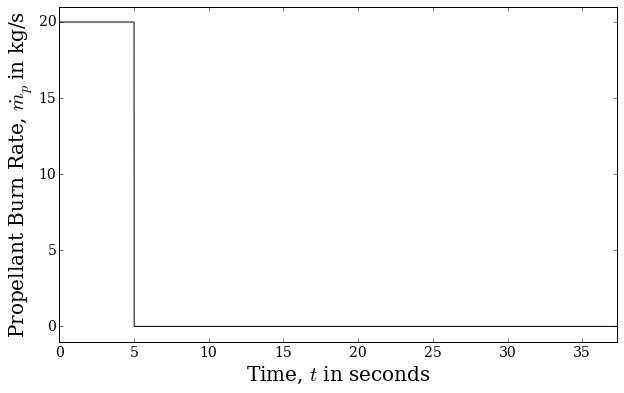

In [201]:
ymax= numpy.amax(u[:,1]);
ymin= numpy.amin(u[:,1]);
xmax= stop_time
pyplot.figure(figsize=(10,6))   #set plot size
pyplot.xlim(0,xmax)             #y-axis plot limits
pyplot.ylim(ymin-1,ymax+1)             #y-axis plot limits
pyplot.tick_params(axis='both', labelsize=14) #increase font size for ticks
pyplot.xlabel('Time, $t$ in seconds', fontsize=20) #x label
pyplot.ylabel('Propellant Burn Rate, $\dot{m}_{p}$ in kg/s', fontsize=20) #y label
pyplot.plot(t,u[:,1], 'k-');

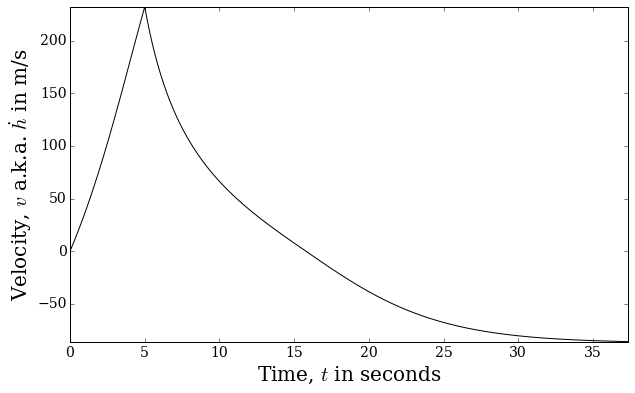

In [206]:
ymax= numpy.amax(u[:,2]);
ymin= numpy.amin(u[:,2]);
xmax= stop_time
pyplot.figure(figsize=(10,6))   #set plot size
pyplot.xlim(0,xmax)             #y-axis plot limits
pyplot.ylim(ymin,ymax)             #y-axis plot limits
pyplot.tick_params(axis='both', labelsize=14) #increase font size for ticks
pyplot.xlabel('Time, $t$ in seconds', fontsize=20) #x label
pyplot.ylabel('Velocity, $v$ a.k.a. $\dot{h}$ in m/s', fontsize=20) #y label
pyplot.plot(t,u[:,2], 'k-');

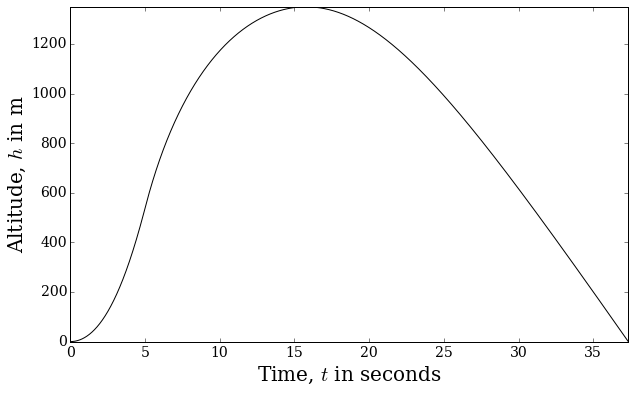

In [198]:
ymax= numpy.amax(u[:,3]);
ymin= numpy.amin(u[:,3]);
xmax= stop_time
pyplot.figure(figsize=(10,6))   #set plot size
pyplot.xlim(0,xmax)             #y-axis plot limits
pyplot.ylim(ymin,ymax)             #y-axis plot limits
pyplot.tick_params(axis='both', labelsize=14) #increase font size for ticks
pyplot.xlabel('Time, $t$ in seconds', fontsize=20) #x label
pyplot.ylabel('Altitude, $h$ in m', fontsize=20) #y label
pyplot.plot(t,u[:,3], 'k-');

In [200]:
q1 = u[int(3.2/dt),0]

q21 = numpy.amax(u[:,2]);
findq2 = numpy.where(u==q21)
findt2 = int(findq2[0])
q22 = findt2*dt
q23 = u[findt2,3]

q31 = numpy.amax(u[:,3]);
findq3 = numpy.where(u==q31)
findt3 = int(findq3[0])
q32 = findt3*dt

q41 = stop_time
q42 = u[int(q41/dt),2]

print("The remaining mass of rocket propellant at 3.2 seconds is", q1, "kg. \n The maximum velocity of the rocket is", q21, "meters per second occuring at a time of",q22,"seconds and an altitude of",q23,"meters. \n The maximum altitude of the rocket is", q31, "meters occuring at a time of",q32,"seconds. The rocket impacts the ground at", q41, "seconds with a velocity of",q42,"meters per second.")

The remaining mass of rocket propellant at 3.2 seconds is 36.0 kg. 
 The maximum velocity of the rocket is 232.447426198 meters per second occuring at a time of 5.000100000000001 seconds and an altitude of 537.677942775 meters. 
 The maximum altitude of the rocket is 1350.44069732 meters occuring at a time of 15.7873 seconds. The rocket impacts the ground at 37.3478 seconds with a velocity of -85.9958855311 meters per second.
